# 威斯康辛州乳腺癌sklearn数据集实战

该项目基于sklearn库中的威斯康辛州乳腺癌数据集，使用高斯朴素贝叶斯进行训练。

## 1. 数据集分析

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#该分类应用于该数据集的的测试集时的混淆矩阵    
from matplotlib.colors import ListedColormap
import matplotlib
#导入sklearns数据集
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
#数据集拆分
from sklearn.model_selection import train_test_split
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#MinMax数据预处理
from sklearn.preprocessing import MinMaxScaler
#使用PCA主成分分析法进行特征提取
from sklearn.decomposition import PCA
#使用高斯朴素贝叶斯进行拟合
from sklearn.naive_bayes import GaussianNB
#绘制ROC曲线
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import pylab as plt

In [2]:
#导入cancer数据集
cancer = load_breast_cancer() 

#使用pd对特征进行观察
feature = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

#显示数据集的特征
print("数据集中特征的参数：{}".format(feature.shape))
feature

数据集中特征的参数：(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**改数据集中存在569组数据，数据分为30个特征。**

C:\Users\86183\AppData\Local\Temp\ipykernel_26444\2544282369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cancer['target'], palette="Set2")#0 恶性 1 良性


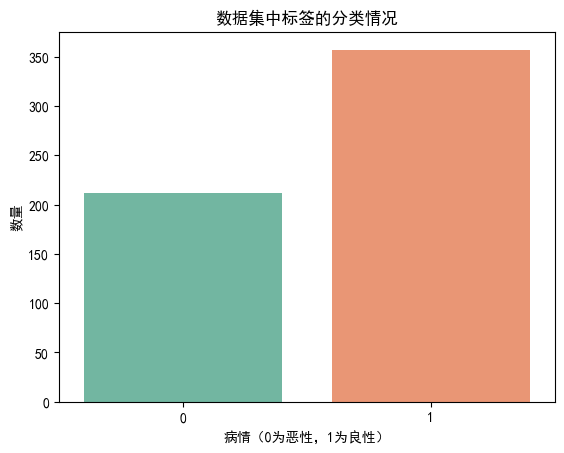

In [3]:
#观察数据集中的标签分类和数量。

#指明字体参数，实现中文标签
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

sns.countplot(x = cancer['target'], palette="Set2")#0 恶性 1 良性
plt.ylabel("数量")
plt.xlabel("病情（0为恶性，1为良性）")
plt.title("数据集中标签的分类情况")

plt.show()

**用直方图观察数据集中每个特征的分布情况。**

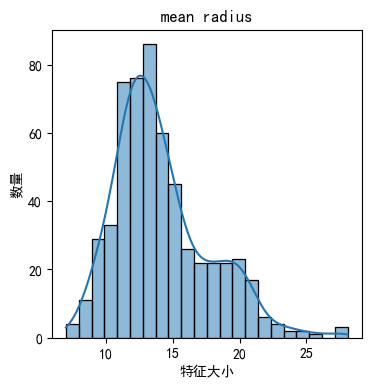

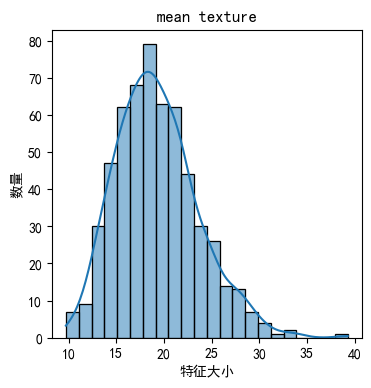

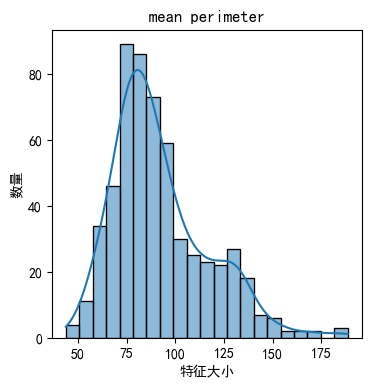

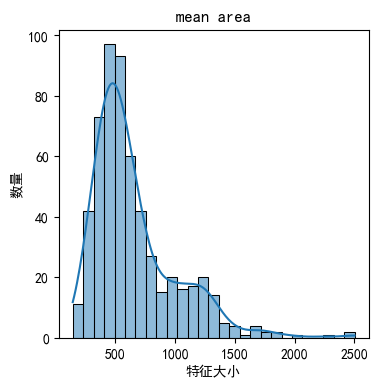

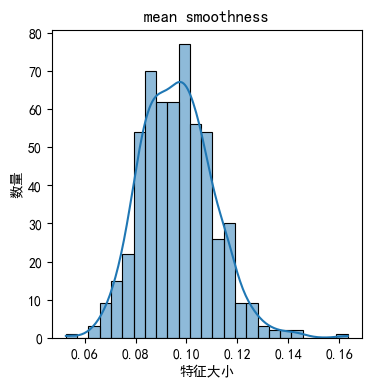

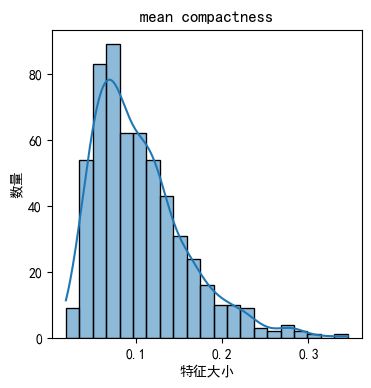

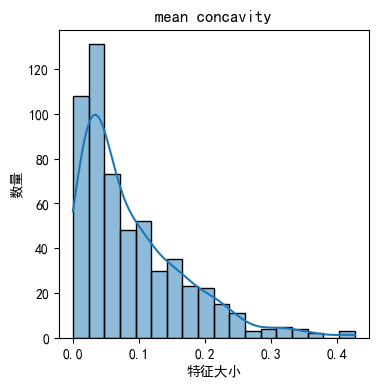

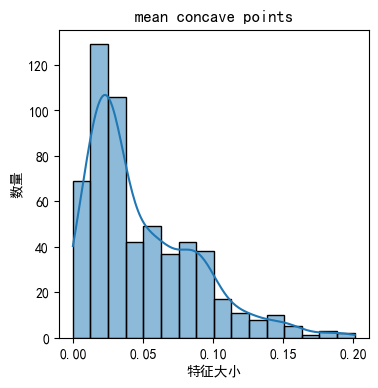

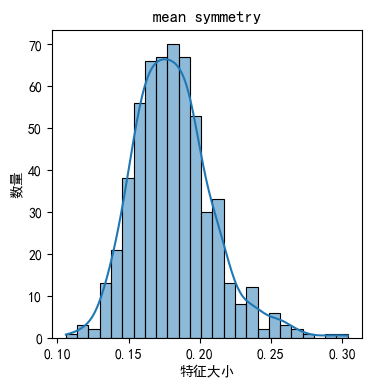

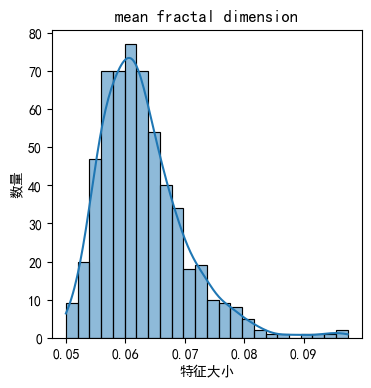

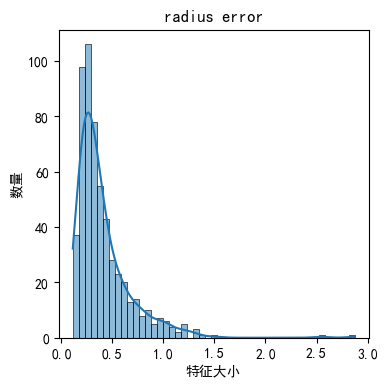

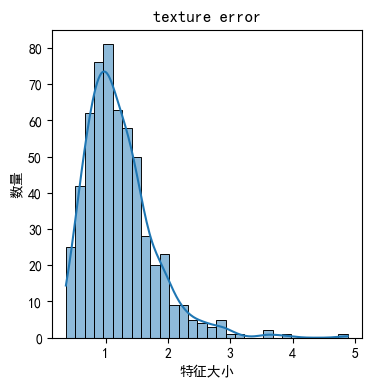

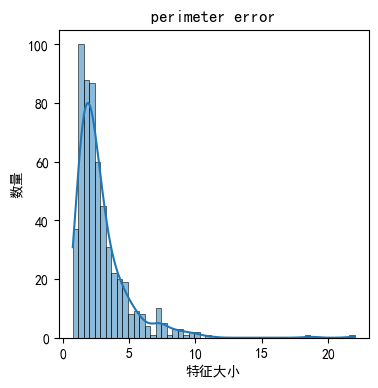

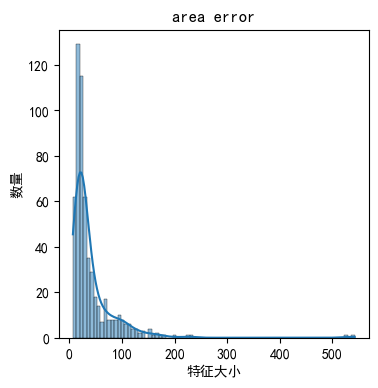

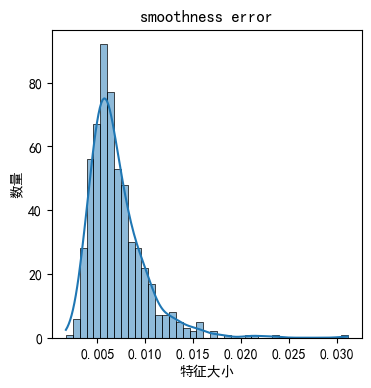

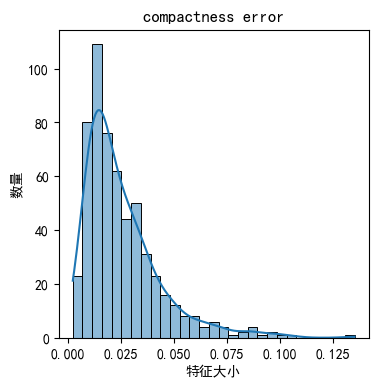

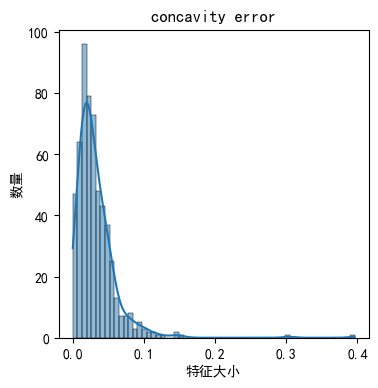

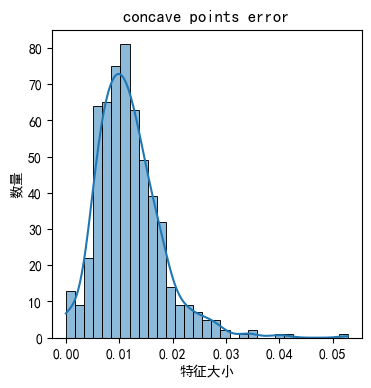

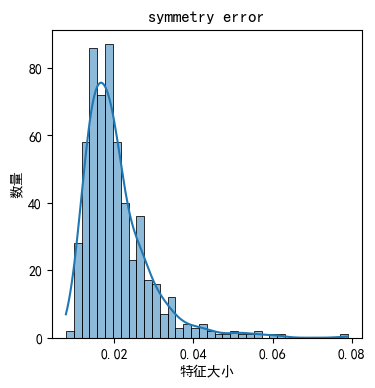

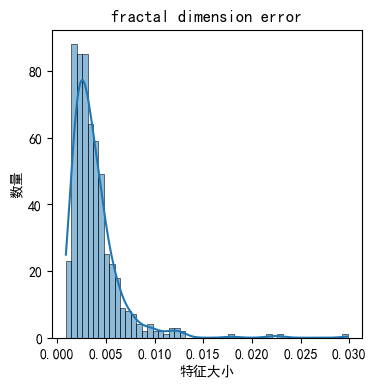

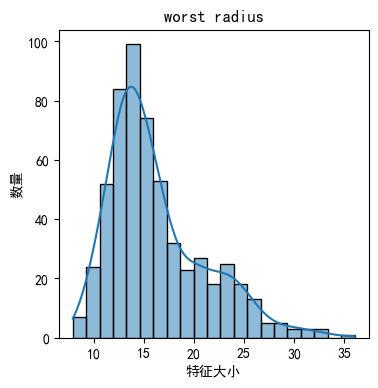

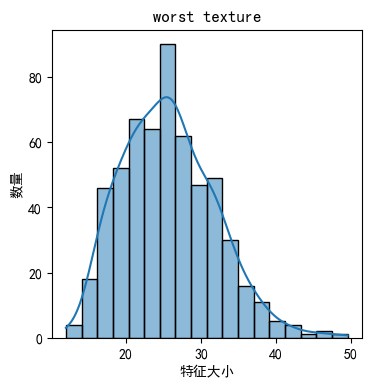

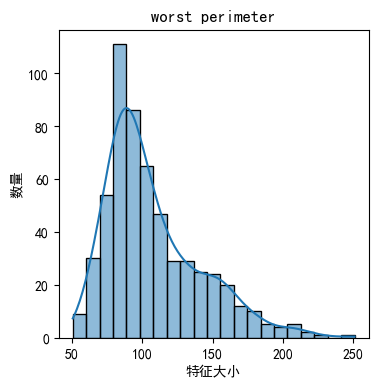

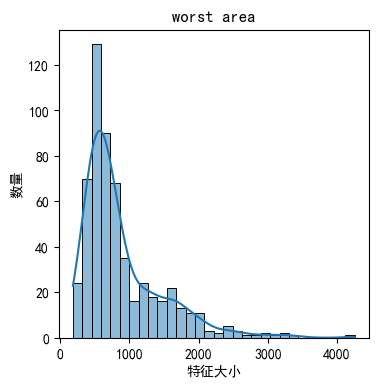

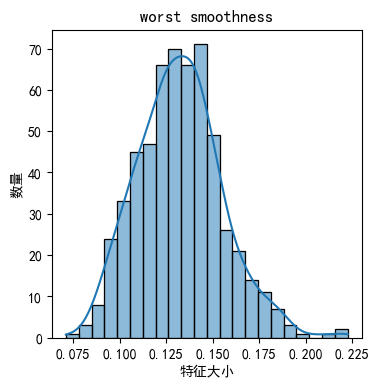

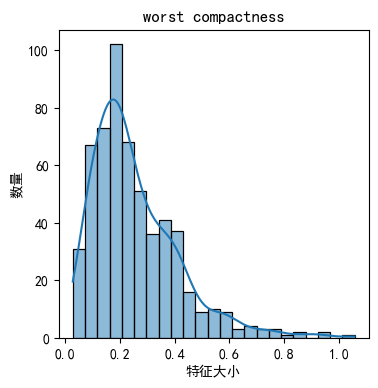

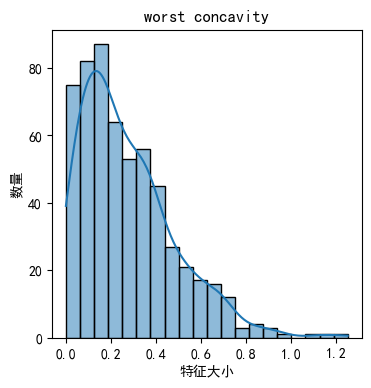

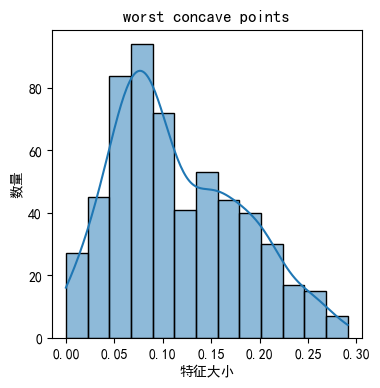

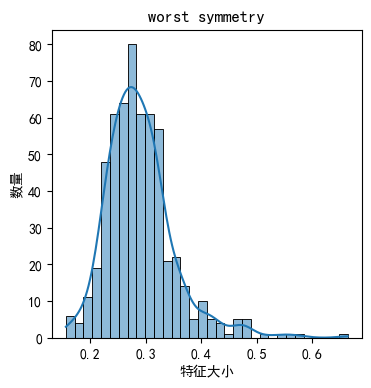

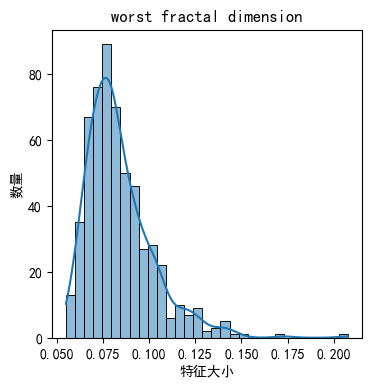

In [4]:

#绘制每个数值属性的直方图
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

for i, feature_name in enumerate(feature.columns.values):
    
    plt.figure(figsize=(4, 4))
    sns.histplot(feature.iloc[:, i], kde=True)

    plt.xlabel("特征大小")
    plt.ylabel("数量")
    plt.title(feature_name)
    plt.show()


C:\Users\86183\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\86183\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


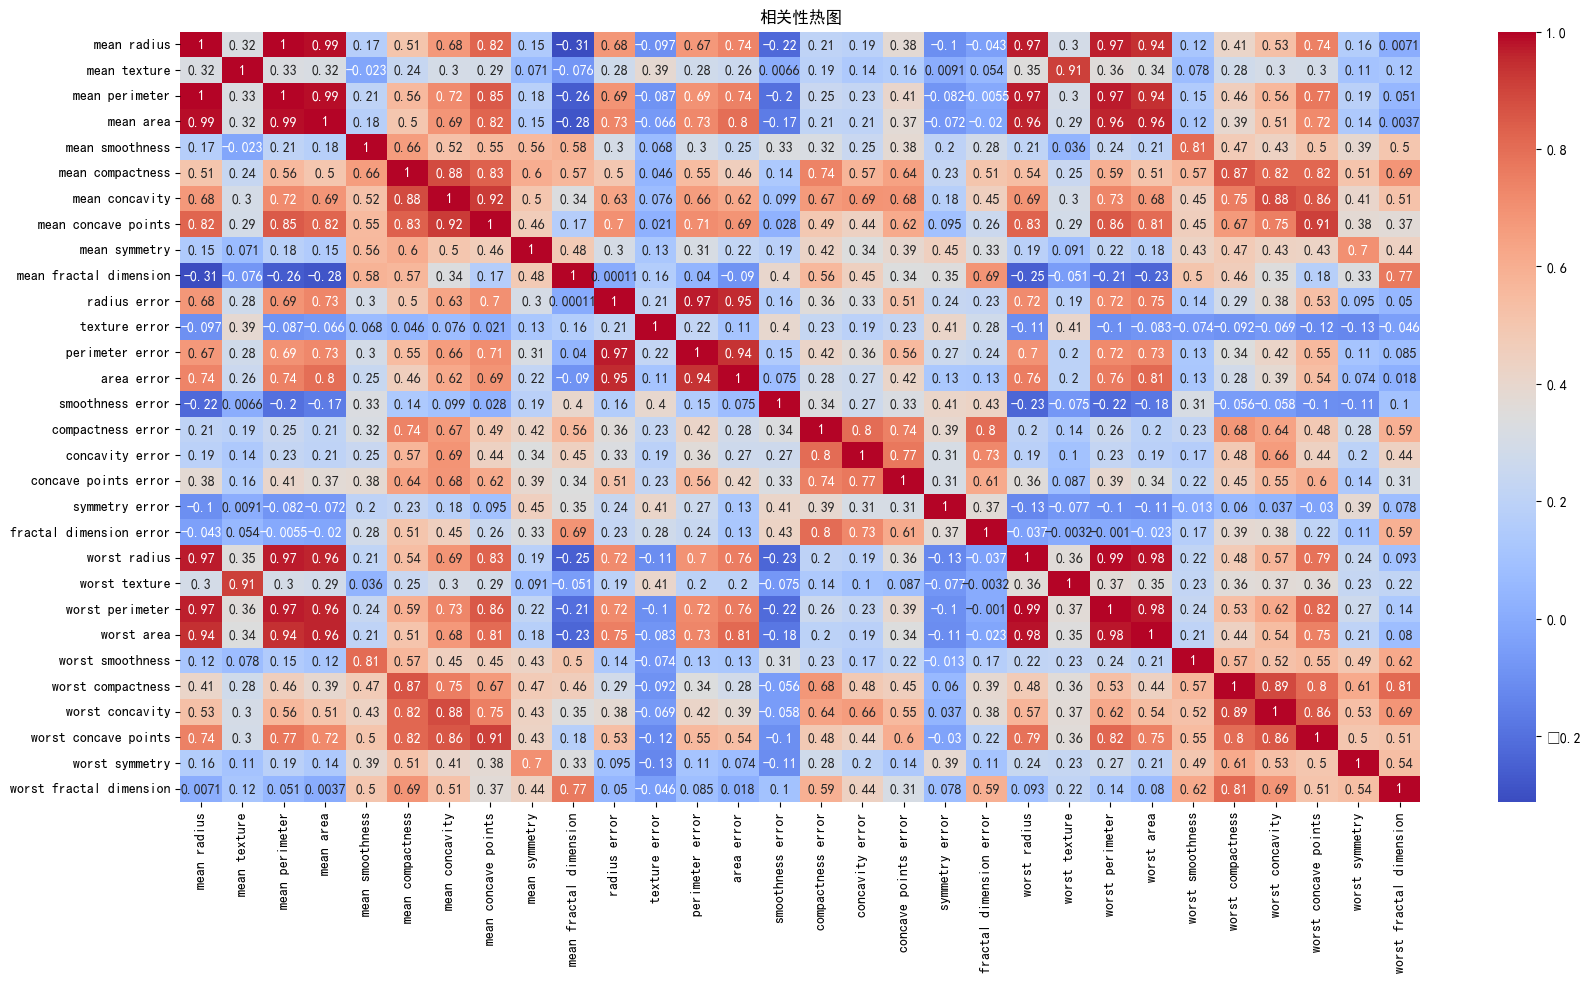

In [5]:
# 可视化相关系数热力图
plt.figure(figsize=(20, 10))
sns.heatmap(feature.corr(), annot=True, cmap="coolwarm")
plt.title("相关性热图")
plt.show()

**热力图中的颜色表示相关性的强度。颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合**

## 2. 使用高斯朴素贝叶斯进行直接拟合测试

**高斯朴素贝叶斯：是假设样本的特征符合高斯分布，或者说符合正态分布时所用的算法。**

In [6]:

#将数据集的数值和分类目标赋值给X和y 
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)


#打印拆分结果
print("数据集拆分情况：")
print("==========")
print("训练集：{}".format(X_train.shape))
print("测试集：{}".format(X_test.shape))
print("==========")


数据集拆分情况：
训练集：(426, 30)
测试集：(143, 30)


In [7]:

gnb = GaussianNB().fit(X_train, y_train)

print("直接拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(gnb.score(X_train, y_train)))
print("测试集得分：{:.4f}".format(gnb.score(X_test, y_test)))
print("==========")

直接拟合的结果：
训练集得分：0.9484
测试集得分：0.9441


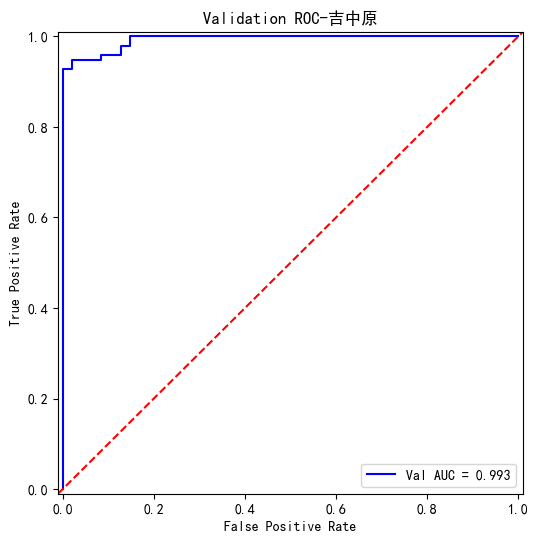

In [20]:
pred1 = gnb.predict_proba(X_test)[:, 1]
# 画图部分
plt.figure("乳腺癌数据绘制ROC", figsize=(6, 6))

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, 'b', label='Val AUC = %0.3f' % roc_auc1)
plt.title('Validation ROC-吉中原')

plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

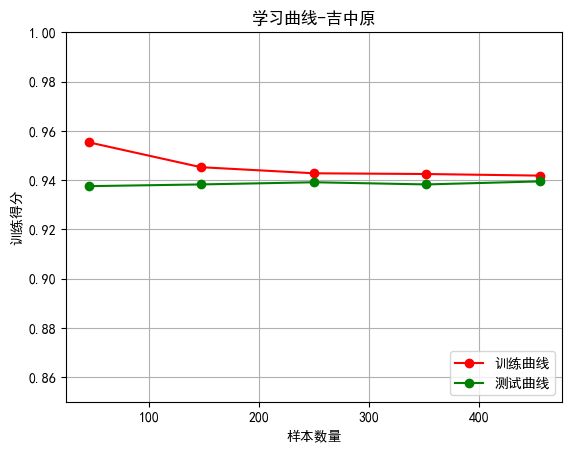

In [9]:


#定义一个学习曲线函数
def plot_learning_curve(est, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    #设置横纵标签
    plt.xlabel("样本数量")
    plt.ylabel("训练得分")
    train_sizes, train_scores, test_scores = learning_curve(
        est, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = "训练曲线")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label = "测试曲线")
    plt.legend(loc="lower right")
    #plt.legend(["Train", "Test"])
    return plt
    
title = "学习曲线-吉中原"
#设定拆分数量
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
est = GaussianNB()

plot_learning_curve(est, title, X, y, ylim=(0.85, 1.0), cv=cv, n_jobs=4)
plt.show()

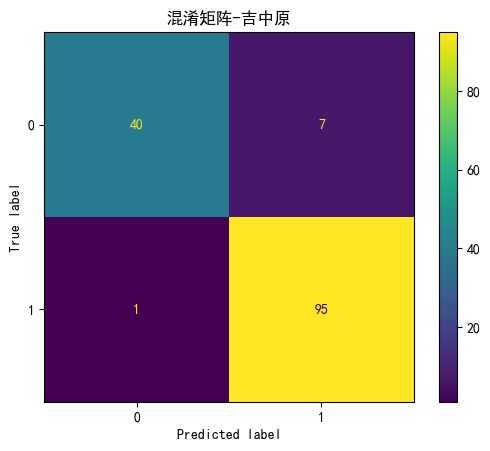

In [10]:
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.title("混淆矩阵-吉中原")
plt.show()

## 3. 将数据进行PCA特征提取——降维处理

通过对数据集原来的特征进行转换，生成新的“特征”或者说成分，会比直接使用原始的特征效果更好，即“数据表达”。 在数据集极为复杂的情况下，比如图像识别，数据表达就显得十分重要。

**PCA主成分分析法：可将多维数据降至低维数据**

In [11]:
#保留90%的相关性
pca = PCA(n_components=0.999999, random_state=62).fit(X_train);

X_pca = pca.transform(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("数据集降维情况：")
print("==========")
print("训练集：{}".format(X_train_pca.shape))
print("测试集：{}".format(X_test_pca.shape))
print("==========")

feature = pd.DataFrame(data = X_pca)
feature

数据集降维情况：
训练集：(426, 8)
测试集：(143, 8)


,0,1,2,3,4,5,6,7
0,1138.568344,-299.072453,48.638973,-13.820915,29.634561,1.368958,1.158188,0.102658
1,1248.734448,8.868090,-39.902974,17.824617,-1.486398,-0.342352,-0.088659,0.219315
2,975.606406,34.098586,-5.764007,3.883728,0.246016,-2.727051,-0.918142,-0.267506
3,-427.810136,-65.844510,9.915123,-12.593789,5.040486,1.393068,-1.131373,-0.115173
4,910.850832,184.598341,-4.603185,6.688684,9.189668,0.910955,-0.318222,0.288255
...,...,...,...,...,...,...,...,...
564,1394.374199,103.815803,33.895996,6.923094,-3.749731,-0.510755,-0.977748,0.126039
565,1025.006049,71.812987,-4.620006,-3.029664,-12.964980,-0.261338,0.294278,0.479303
566,294.334098,45.516376,-12.711609,-8.804484,-7.610869,-0.910436,-2.249551,-0.482809
567,1104.588504,28.210965,-23.990763,-24.365323,-0.443536,3.945159,-1.602502,-0.507852


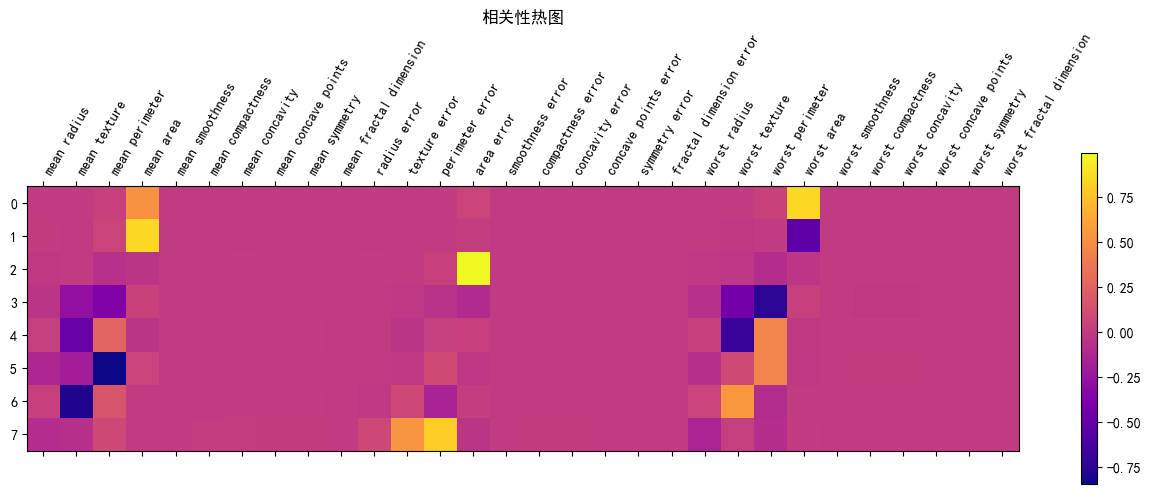

In [12]:
#热度图可视化原始特征于PCA主成分之间的关系
plt.matshow(pca.components_, cmap='plasma')
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

matplotlib.rcParams['axes.unicode_minus'] =False
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.title("相关性热图")
plt.show()

In [13]:
gnb_pca = GaussianNB().fit(X_train_pca, y_train)

print("进行数据降维处理后的结果：")
print("==========")
print("训练集得分：{:.4f}".format(gnb_pca.score(X_train_pca, y_train)))
print("测试集得分：{:.4f}".format(gnb_pca.score(X_test_pca, y_test)))
print("==========")

进行数据降维处理后的结果：
训练集得分：0.9108
测试集得分：0.9161


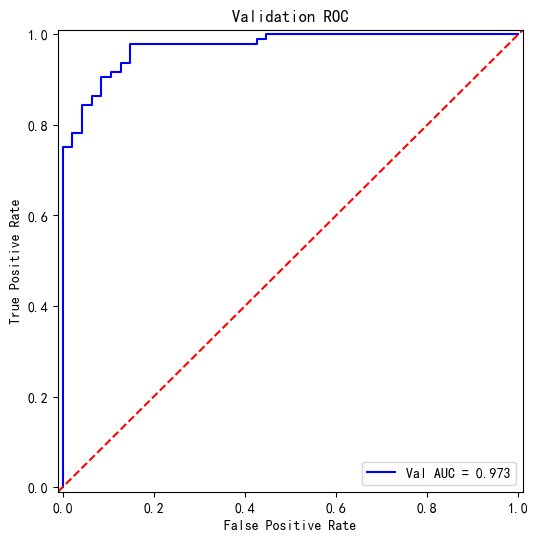

In [21]:
pred2 = gnb_pca.predict_proba(X_test_pca)[:, 1]
# 画图部分
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.figure("乳腺癌数据绘制ROC-吉中原", figsize=(6, 6))
plt.title('Validation ROC')
plt.plot(fpr2, tpr2, 'b', label='Val AUC = %0.3f' % roc_auc2)
plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

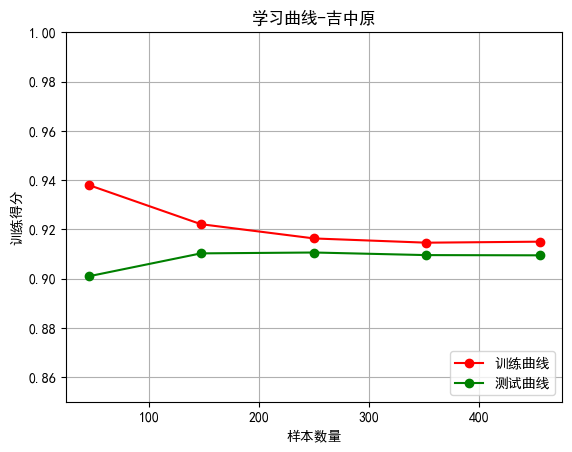

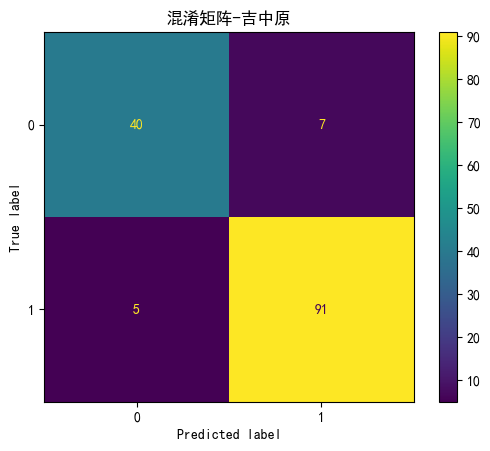

In [15]:
plot_learning_curve(est, title, X_pca, y, ylim=(0.85, 1.0), cv=cv, n_jobs=4)
ConfusionMatrixDisplay.from_estimator(gnb_pca, X_test_pca, y_test)
plt.title("混淆矩阵-吉中原")
plt.show()

## 4. 进行MinMaxScaler预处理查看拟合情况

**MaxMinScaler的原理：把所有数据压缩到0~1之间，这样会使模型训练速度更快并且准确性更高。**

In [16]:
#进行预处理，并查看处理后数据情况
scaler = MinMaxScaler().fit(X_train)

X_pp= scaler.transform(X)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)

feature = pd.DataFrame(data = X_pp, columns = cancer.feature_names)

feature

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.504383,0.000000,0.532650,0.356389,0.593753,0.792037,0.703140,0.731113,0.736186,0.605518,...,0.610409,0.130067,0.661431,0.445464,0.572692,0.698643,0.568610,0.912027,0.598462,0.541370
1,0.630736,0.255709,0.604496,0.495838,0.289880,0.181768,0.203608,0.348757,0.407367,0.141323,...,0.596155,0.307378,0.530273,0.429833,0.301026,0.168530,0.192971,0.639175,0.233590,0.288064
2,0.587639,0.376125,0.583867,0.443062,0.514309,0.431017,0.462512,0.635686,0.546587,0.211247,...,0.544258,0.369204,0.498246,0.368549,0.446763,0.431816,0.359744,0.835052,0.403706,0.275856
3,0.182624,0.346021,0.210983,0.092551,0.811321,0.811361,0.565604,0.522863,0.832611,1.000000,...,0.227761,0.397492,0.225611,0.085376,0.909445,0.920760,0.548642,0.884880,1.000000,1.000000
4,0.617023,0.137024,0.620145,0.483395,0.430351,0.347893,0.463918,0.518390,0.405742,0.186816,...,0.506615,0.110819,0.496721,0.335302,0.397241,0.188893,0.319489,0.558419,0.157500,0.184300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.679220,0.415571,0.669227,0.561486,0.526948,0.296055,0.571462,0.690358,0.360780,0.132056,...,0.612967,0.394576,0.567383,0.447449,0.422710,0.195865,0.328035,0.761512,0.097575,0.136572
565,0.609188,0.618339,0.592403,0.467948,0.407782,0.257714,0.337395,0.486630,0.374865,0.113100,...,0.548644,0.740157,0.510955,0.374008,0.250088,0.174727,0.256789,0.559450,0.198502,0.096050
566,0.436309,0.612457,0.429506,0.295074,0.288165,0.254340,0.216753,0.263519,0.287107,0.137321,...,0.376508,0.619714,0.367089,0.223402,0.230987,0.304433,0.271805,0.487285,0.128721,0.196338
567,0.632205,0.655709,0.655712,0.469664,0.588336,0.790197,0.823336,0.755467,0.724269,0.425442,...,0.623566,0.774278,0.661431,0.396338,0.592501,0.922752,0.749760,0.910653,0.497142,0.584605


In [17]:
gnb_pp = GaussianNB().fit(X_train_pp, y_train)

print("MinMaxScaler预处理拟合的结果：")
print("==========")
print("训练集得分：{:.4f}".format(gnb_pp.score(X_train_pp, y_train)))
print("测试集得分：{:.4f}".format(gnb_pp.score(X_test_pp, y_test)))
print("==========")

MinMaxScaler预处理拟合的结果：
训练集得分：0.9460
测试集得分：0.9371


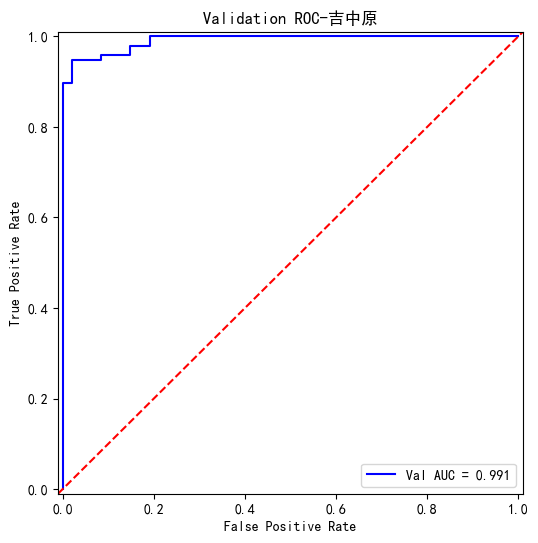

In [22]:
pred3 = gnb_pp.predict_proba(X_test_pp)[:, 1]
# 画图部分
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.figure("乳腺癌数据绘制ROC", figsize=(6, 6))
plt.title('Validation ROC-吉中原')
plt.plot(fpr3, tpr3, 'b', label='Val AUC = %0.3f' % roc_auc3)
plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

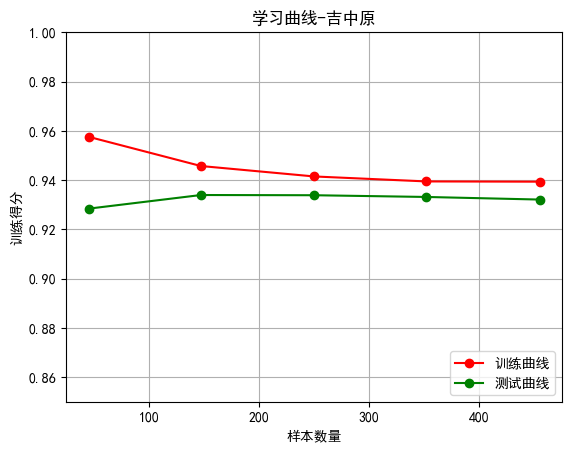

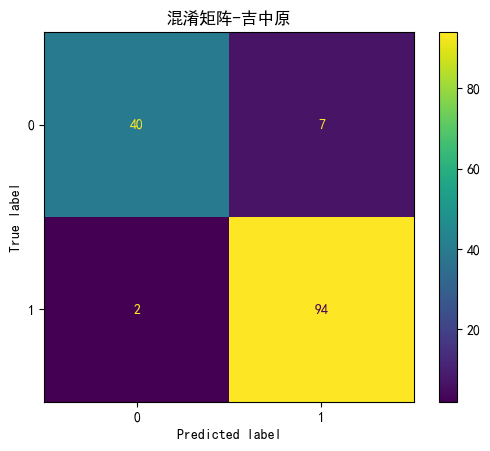

In [19]:
plot_learning_curve(est, title, X_pp, y, ylim=(0.85, 1.0), cv=cv, n_jobs=4)
ConfusionMatrixDisplay.from_estimator(gnb_pp, X_test_pp, y_test)
plt.title("混淆矩阵-吉中原")
plt.show()

## 5. 效果分析总结

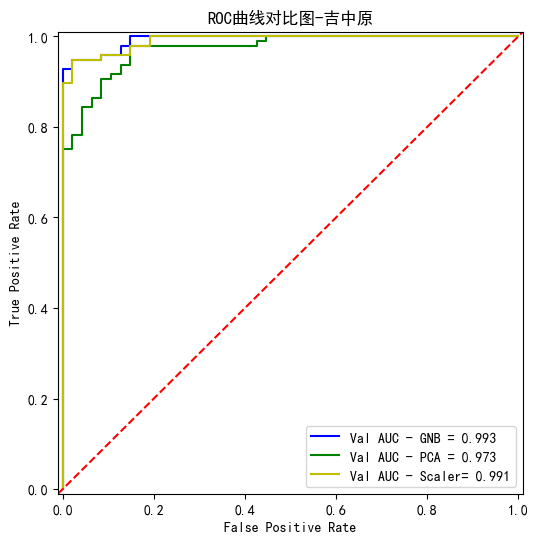

In [25]:
#ROC曲线对比图

plt.figure("乳腺癌数据绘制ROC", figsize=(6, 6))

plt.plot(fpr1, tpr1, 'b', label='Val AUC - GNB = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label='Val AUC - PCA = %0.3f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label='Val AUC - Scaler= %0.3f' % roc_auc3)

plt.title('ROC曲线对比图-吉中原')

plt.legend(loc='lower right')
plt.plot([-0.01, 1.01], [-0.01, 1.01], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


根据测试的结果，可以看出不同数据处理方法对高斯朴素贝叶斯模型的性能产生了一定影响。以下是对每种处理方法的分析：

1. 高斯朴素贝叶斯直接拟合：
   - 训练集得分：0.9484
   - 测试集得分：0.9441
   - Val AUC： 0.993
   - 在未经过任何特征处理的情况下，模型在训练集和测试集上表现良好，具有较高的准确性。

2. 特征提取降维处理后的拟合结果：
   - 训练集得分：0.9108
   - 测试集得分：0.9161
   - Val AUC： 0.973
   - 在进行特征提取和降维处理后，模型的训练集和测试集得分略有下降，但仍然保持在较高水平，说明模型在处理过程中仍保持了较好的性能。

3. MinMaxScaler预处理的拟合结果：
   - 训练集得分：0.9460
   - 测试集得分：0.9371
   - Val AUC： 0.991
   - 使用MinMaxScaler进行预处理后，模型的训练集和测试集得分略低于直接拟合的结果，但基本与直接拟合的结果持平。

综合来看，使用高斯朴素贝叶斯对该数据集有较好的拟合效果，说明该数据具有较强的正态性，而进行MinMaxScaler预处理对数据集的拟合效果影响并不是很大，反而特征提取降维处理会使拟合效果略微降低，影响模型得分。
